In [1]:
%load_ext autoreload
%autoreload 2

from set_grid_b import *
import psyplot.project as psy
import psyplot
from psy_maps.plotters import FieldPlotter
import tensorflow as tf
from tensorflow import keras
import netCDF4
import glob
import xarray as xr
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from tonetcdf import npy_to_netcdf_outputv1, add_prediction

%matplotlib inline
%config InlineBackend.close_figures = False


print("import ok")

import ok


In [2]:
reso = "low"
date = "0005-02-21-00000.nc"
data_path = "/gpfsdswork/dataset/ClimSim_low-res/train/" + date[:7]
my_data_path = "../data/nc_data/"

file_input  =  data_path + '/E3SM-MMF.mli.' + date
file_imerged  = my_data_path + reso +'_res/merged_E3SM-MMF.mli.' + date




grid = 'scvt/ClimSim_'+ reso + '-res_grid-info.nc'
grid_b = '../data/nc_data/grid_with_boundaries_'+reso + 'res.nc'


In [3]:
setup_visu(grid, grid_b, file_input, file_imerged)

creating low resolution grid boundaries..
xyz coordinates from netcdf file ok
triangulation with delaunay ok
step  0
step  100
step  200
step  300
polygones ok
read grid info from netcedf file ok !
../data/nc_data/low_res/merged_E3SM-MMF.mli.0005-02-21-00000.nc  created !
../data/nc_data/low_res/merged_E3SM-MMF.mlo.0005-02-21-00000.nc  created !


In [4]:
# normalize + scale data


f_mli = glob.glob(file_input)


print(f'[VISU] Total # of input files: {len(f_mli)}')
print(f'[VISU] Total # of columns (nfiles * ncols): {len(f_mli)*384}')
tds = load_nc_dir_with_generator(f_mli)

[VISU] Total # of input files: 1
[VISU] Total # of columns (nfiles * ncols): 384


2024-05-13 14:08:37.889749: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfslocalsup/spack_soft/sox/14.4.2/gcc-8.4.1-egb3ni235l3f4q4lxbo3gfqgws6fdecl/lib:/gpfslocalsup/spack_soft/openmpi/4.1.1/gcc-8.5.0-mbafzinnzpvx22cqojowmnmatg2po2aw/lib:/gpfslocalsup/spack_soft/cudnn/8.1.1.33-11.2/gcc-8.3.1-dgsfwc7e23vzc36jopc5nxyunptm2ieh/lib64:/gpfslocalsup/spack_soft/nccl/2.9.6-1/gcc-8.3.1-2c3rwcolksekujszxrg7r72uxmekxx2y/lib:/gpfslocalsys/cuda/11.2/nvvm/lib64:/gpfslocalsys/cuda/11.2/extras/CUPTI/lib64:/gpfslocalsys/cuda/11.2/lib64:/gpfslocalsys/cuda/11.2/samples/common/lib/linux/x86_64:/gpfslocalsys/cuda/11.2/targets/x86_64-linux/lib:/gpfslocalsys/slurm/current/lib/slurm:/gpfslocalsys/slurm/current/lib:/gpfslocalsys/slurm/current/lib/slurm:/gpfslocalsys/slurm/current/lib
2024-05-13 14:08:37.889789: W tensorflow/stream_executor/cuda

In [5]:
new_model = tf.keras.models.load_model('../neural_network/my_model')
new_model.summary()

Model: "Emulator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 124)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 512)          64000       ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 512)          262656      ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 128)          65664       ['dense_1[0][0]']                
                                                                                           

In [6]:
npy_prediction = '../data/npy_data/prediction/first_test_prediction.npy'
nc_prediction = '../data/nc_data/low_res/E3SM-MMF.mlo.pred'+date
visu_file_unscale = '../data/nc_data/generated/prediction_r4visu_unscaled_'+reso+'_'+date
visu_file = '../data/nc_data/generated/prediction_r4visu_'+reso+'_'+date

scale = ('/gpfswork/rech/psl/upu87pm/ClimSim/preprocessing/normalizations/outputs/output_scale.nc')

In [7]:
f_save = npy_prediction
ml_out = new_model.predict(tds)
np.save(f_save, ml_out)

1/1 [==============================] - 2s 2s/step


In [8]:
npy_to_netcdf_outputv1(npy_prediction, grid_b, nc_prediction)

In [9]:
add_prediction(file_imerged.replace('.mli.','.mlo.'), nc_prediction, visu_file)
add_prediction(file_imerged.replace('.mli.','.mlo.'), nc_prediction, visu_file_unscale, scale)

unscalling
unscalling
unscalling
unscalling
unscalling
unscalling
unscalling
unscalling
unscalling
unscalling


In [ ]:
psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [8., 6.]


Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f29590d1150>>
Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3765, in atexit_operations
    self._atexit_once()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3748, in _atexit_once
    self.history_manager.end_session()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/history.py", line 602, in end_session
    self.writeout_cache()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "/gpfslocalsup/pub/anaconda-py3/

In [54]:
data = xr.open_dataset(visu_file_unscale)

ValueError: Can only plot 2-dimensional data!

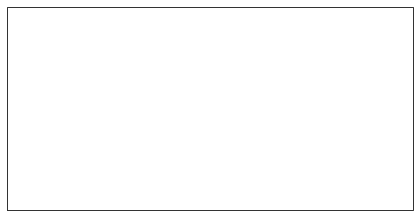

In [55]:
var = 'ptend_t'



maps = data.psy.plot.mapplot( cmap = 'bwr', name= var, title='dt', ax=(2, 2), lev = 9, datagrid={'c': 'k', 'lw': 0.1}, projection='robin',
                        bounds= np.linspace(-2*1e-4,2*1e-4,50))
maps = psy.plot.mapplot(visu_file_unscale, cmap = 'bwr', name= var+'_pred', title='dt', ax=(2, 2), lev = 9, datagrid={'c': 'k', 'lw': 0.1}, projection='robin',
                        bounds= np.linspace(-2*1e-4,2*1e-4,50))
maps.share(keys='bounds')


../data/nc_data/low_res/merged_E3SM-MMF.mli.0005-02-21-00000.nc


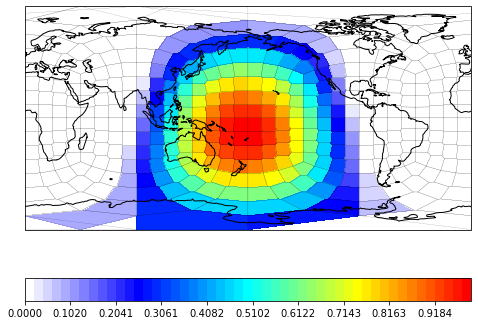

In [31]:
var = 'pbuf_COSZRS'
print(file_imerged)

maps = psy.plot.mapplot(file_imerged, name = [var, var, datagrid={'c': 'k', 'lw': 0.1},
                        bounds= np.linspace(0,1,50))